In [1]:
import sys

sys.path.append("../../")
from SynTemp.SynUtils.utils import load_database, load_from_pickle

## 1. Split data

In [ ]:
import pandas as pd
from SynTemp.SynUtils.utils import train_val_test_split_df, save_database

original_data = load_database("../../Data/Temp/data_aam.json.gz")
original_data = pd.DataFrame(original_data)

train, test, valid = train_val_test_split_df(original_data, target="class")
train, test, valid = (
    train.to_dict("records"),
    test.to_dict("records"),
    valid.to_dict("records"),
)

save_database(train, "../../Data/Temp/Benchmark/train.json.gz")
save_database(test, "../../Data/Temp/Benchmark/test.json.gz")
save_database(valid, "../../Data/Temp/Benchmark/valid.json.gz")

# Count number of templates

In [2]:
raw = load_from_pickle("../../Data/Temp/Benchmark/Raw/templates.pkl.gz")
complete = load_from_pickle("../../Data/Temp/Benchmark/Complete/templates.pkl.gz")
expand = load_from_pickle("../../Data/Temp/Benchmark/Expand/templates.pkl.gz")

In [3]:
def calculate(data):
    number = []
    for i in range(len(data)):
        number.append(len(data[i]))
    return number


raw_result = calculate(raw)
complete_result = calculate(complete)
expand_result = calculate(expand)

print(raw_result)
print(complete_result)
print(expand_result)

[313, 1577, 9798, 22248]
[297, 1499, 9448, 21638]
[341, 1626, 9964, 22731]


# Analyze descriptors

In [4]:
complete = load_from_pickle("../../Data/Temp/Benchmark/Complete/templates.pkl.gz")
data_cluster = load_from_pickle(
    "../../Data/Temp/Benchmark/Complete/data_cluster.pkl.gz"
)
temp_0 = complete[0]

In [5]:
len(temp_0)

297

In [ ]:
33690 / 40012

## Template percentage and DPO rule

- 8: amine alkylation - Fluoro
- 2: amine alkylation - cloro
- 6: amid + H20
- 5: ester + h20
- 0: amine alkylation - bromo
- 12: C-C formation with boron br
- 14: imin + reduction
- 3: C-Cl + h2O
- 1: C-Br + H2O
- 13: S-Cl + NH
- 10: HI + C-OH
- 21: amine alkylation - ido
- 4: NH+C=N??
- 23: reduction carbonyl
- 17: amine alkylation - Fluoro (aromatic)
- 7: reduction alkene
- 44: imin 
- 46 : C-C formation with boron Cl
- 15: S-Cl + OH
- 37: C-I + OH

/homes/biertank/tieu/Documents/Project/TACsy/SynEco/SynTemp/Docs/Analysis/_plot_analysis.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


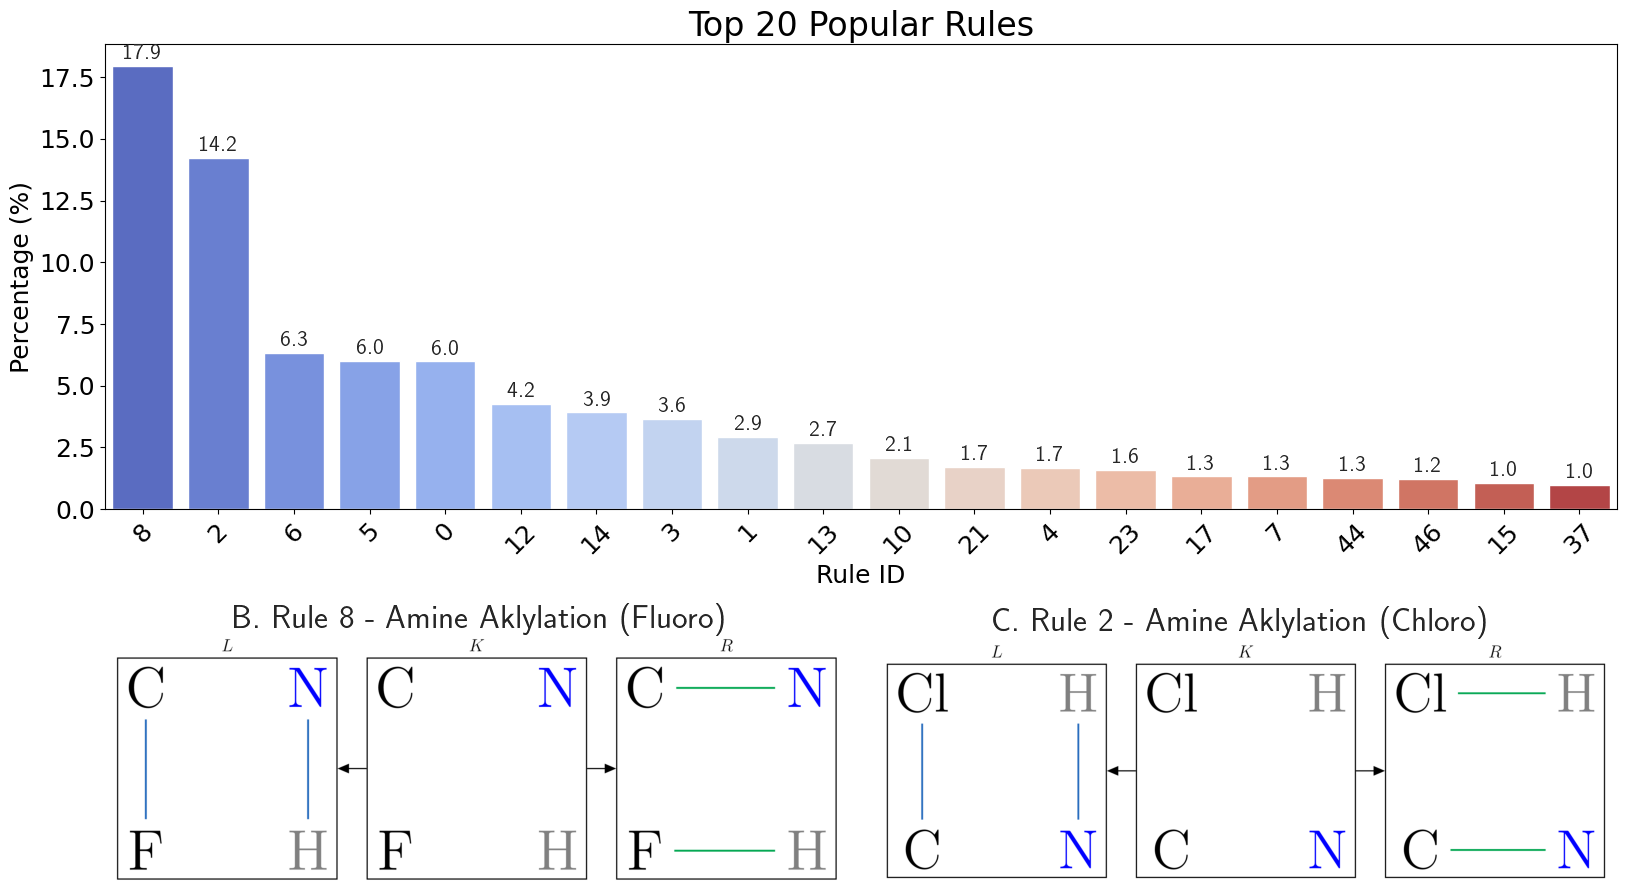

In [6]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from _plot_analysis import plot_top_rules_with_seaborn, load_and_title_png

# Set up the figure and GridSpec layout
fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1], figure=fig)

# Create a subplot that spans the first row across both columns
ax1 = fig.add_subplot(
    gs[0, :]
)  # The ':' indicates spanning across all columns in row 0


plot_top_rules_with_seaborn(temp_0, top_n=20, ax=ax1)

# Plot on the second row, first column
ax2 = fig.add_subplot(gs[1, 0])
load_and_title_png(
    "../../Docs/Analysis/fig/rule8.png",
    title="B. Rule 8 - Amine Aklylation (Fluoro)",
    ax=ax2,
)

# Plot on the second row, second column
ax3 = fig.add_subplot(gs[1, 1])
load_and_title_png(
    "../../Docs/Analysis/fig/rule2.png",
    title="C. Rule 2 - Amine Aklylation (Chloro)",
    ax=ax3,
)

# Adjust the layout to add space between subplots and potentially solve the overlapping issue
plt.subplots_adjust(hspace=0.1, wspace=0.5)

# Adjust the layout to add space between subplots, addressing overlapping xtick and ytick labels
plt.tight_layout(pad=0.5)

# plt.savefig('../../Docs/Analysis/fig/rule_distribution.pdf', dpi=600)
plt.show()

## Descriptors Analysis

In [7]:
from _plot_analysis import calculate_value_percentage

In [8]:
print(calculate_value_percentage(temp_0, "Reaction Type"))
print(calculate_value_percentage(data_cluster, "Reaction Type"))

{'Elementary': 56.9, 'Complicated': 43.1}
{'Elementary': 88.66, 'Complicated': 11.34}


In [9]:
print(calculate_value_percentage(temp_0, "Topo Type"))
print(calculate_value_percentage(data_cluster, "Topo Type"))

{'Single Cyclic': 50.84, 'Combinatorial Cyclic': 37.04, 'Complex Cyclic': 6.06, 'Acyclic': 6.06}
{'Single Cyclic': 88.29, 'Combinatorial Cyclic': 9.94, 'Complex Cyclic': 1.4, 'Acyclic': 0.37}


In [10]:
print(calculate_value_percentage(temp_0, "Reaction Step"))
print(calculate_value_percentage(data_cluster, "Reaction Step"))

{1: 56.9, 2: 34.34, 3: 8.75}
{1: 88.66, 2: 10.98, 3: 0.36}


In [11]:
acyl = [value for value in temp_0 if value["Topo Type"] == "Acyclic"]
single = [value for value in temp_0 if value["Topo Type"] == "Single Cyclic"]
combo = [value for value in temp_0 if value["Topo Type"] == "Combinatorial Cyclic"]
comp = [value for value in temp_0 if value["Topo Type"] == "Complex Cyclic"]
print("Acyclic", calculate_value_percentage(acyl, "Rings"))
print("Single Cyclic", calculate_value_percentage(single, "Rings"))
print("Combinatorial Cyclic", calculate_value_percentage(combo, "Rings"))
print("Complex Cyclic", calculate_value_percentage(comp, "Rings"))

Acyclic {(0,): 100.0}
Single Cyclic {(4,): 70.86, (6,): 19.21, (5,): 7.28, (7,): 1.99, (3,): 0.66}
Combinatorial Cyclic {(4, 4): 28.18, (3, 3): 1.82, (4, 4, 4): 0.91, (4, 5, 5): 1.82, (3, 5): 8.18, (4, 5): 13.64, (4, 6): 20.0, (4, 4, 5): 7.27, (6, 6): 1.82, (4, 5, 7): 0.91, (5, 5): 1.82, (3, 4, 6): 0.91, (5, 5, 6): 0.91, (6, 6, 6): 0.91, (4, 6, 8): 1.82, (4, 4, 6): 1.82, (4, 4, 7): 0.91, (4, 6, 7): 0.91, (6, 7, 7): 0.91, (5, 6, 6): 0.91, (3, 5, 6): 0.91, (3, 3, 3): 0.91, (4, 7): 0.91, (3, 4): 0.91}
Complex Cyclic {(0, 3): 27.78, (0, 4): 61.11, (0, 4, 4): 5.56, (0, 7): 5.56}


In [12]:
acyl = [value for value in data_cluster if value["Topo Type"] == "Acyclic"]
single = [value for value in data_cluster if value["Topo Type"] == "Single Cyclic"]
combo = [
    value for value in data_cluster if value["Topo Type"] == "Combinatorial Cyclic"
]
comp = [value for value in data_cluster if value["Topo Type"] == "Complex Cyclic"]
print("Acyclic", calculate_value_percentage(acyl, "Rings"))
print("Single Cyclic", calculate_value_percentage(single, "Rings"))
print("Combinatorial Cyclic", calculate_value_percentage(combo, "Rings"))
print("Complex Cyclic", calculate_value_percentage(comp, "Rings"))

Acyclic {(0,): 100.0}
Single Cyclic {(4,): 98.37, (6,): 1.39, (5,): 0.21, (7,): 0.03, (3,): 0.0}
Combinatorial Cyclic {(4, 4): 88.47, (3, 3): 1.16, (4, 4, 4): 0.39, (4, 5, 5): 0.3, (3, 5): 2.0, (4, 5): 2.54, (4, 6): 1.4, (4, 4, 5): 0.66, (6, 6): 0.39, (4, 5, 7): 0.39, (5, 5): 0.15, (3, 4, 6): 0.06, (6, 7, 7): 0.06, (5, 5, 6): 0.21, (6, 6, 6): 0.09, (4, 6, 8): 0.06, (4, 4, 6): 0.87, (4, 5, 6): 0.18, (4, 6, 7): 0.15, (4, 4, 7): 0.03, (5, 6): 0.18, (5, 6, 6): 0.03, (3, 5, 6): 0.03, (3, 3, 3): 0.06, (4, 7): 0.09, (3, 5, 5): 0.03, (3, 4): 0.03}
Complex Cyclic {(0, 3): 69.7, (0, 4): 29.87, (0, 4, 4): 0.21, (0, 7): 0.21}


## Descriptors Visualization

### Pie chart

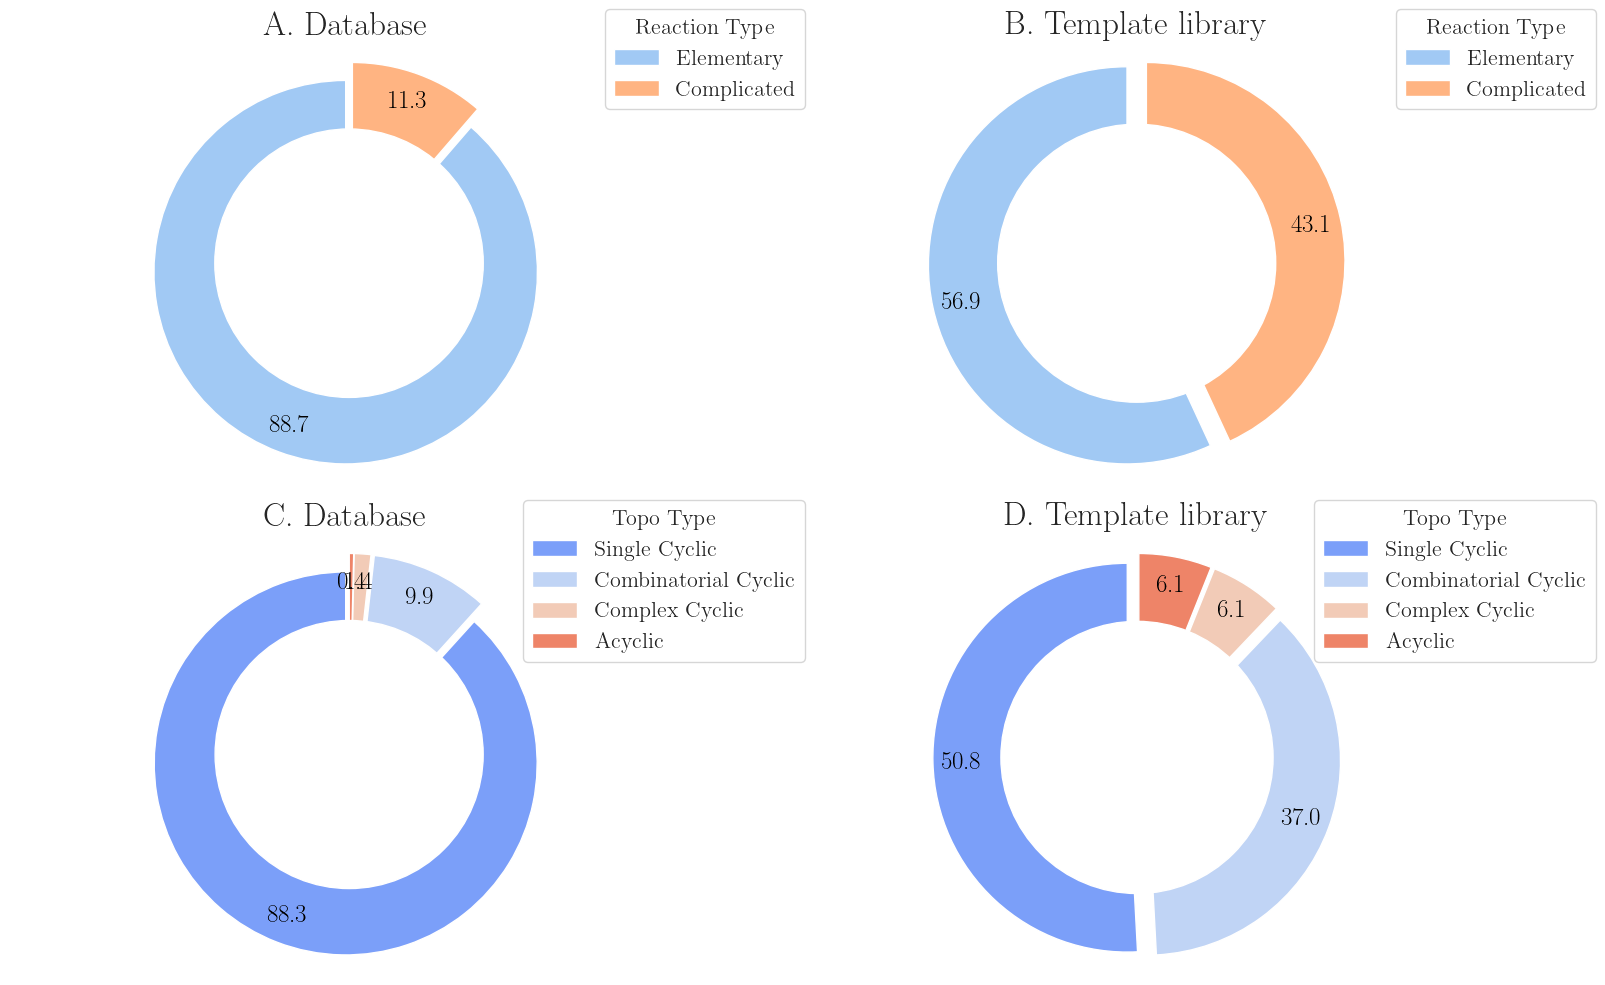

In [14]:
from _plot_analysis import create_pie_chart
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # Adjust size as needed

# Plot the pie chart in the first subplot (top-left)
create_pie_chart(
    temp_0,
    "Reaction Type",
    ax=axs[0, 1],
    title="B. Template library",
    color_pallet="pastel",
)

create_pie_chart(
    data_cluster,
    "Reaction Type",
    ax=axs[0, 0],
    title="A. Database",
    color_pallet="pastel",
)

create_pie_chart(
    temp_0,
    "Topo Type",
    ax=axs[1, 1],
    title="D. Template library",
    color_pallet="coolwarm",
)

create_pie_chart(
    data_cluster,
    "Topo Type",
    ax=axs[1, 0],
    title="C. Database",
    color_pallet="coolwarm",
)


plt.tight_layout()
# plt.savefig('../../Docs/Analysis/fig/Analysis_rtype_topo.pdf', dpi = 600)
plt.show()

### Distribution

In [15]:
from _plot_analysis import count_column_values, plot_rules_distribution

In [16]:
element = [value for value in temp_0 if value["Reaction Type"] in ["Elementary"]]
complex = [value for value in temp_0 if value["Reaction Type"] in ["Complicated"]]
element_count = count_column_values(element, "Rings")
complex_count = count_column_values(complex, "Rings")

In [17]:
element_all = [
    value for value in data_cluster if value["Reaction Type"] in ["Elementary"]
]
complex_all = [
    value for value in data_cluster if value["Reaction Type"] in ["Complicated"]
]
element_count_all = count_column_values(element_all, "Rings")
complex_count_all = count_column_values(complex_all, "Rings")

/homes/biertank/tieu/Documents/Project/TACsy/SynEco/SynTemp/Docs/Analysis/_plot_analysis.py:377: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=types_of_rules, y=percentages, palette=color_pallet)
/homes/biertank/tieu/Documents/Project/TACsy/SynEco/SynTemp/Docs/Analysis/_plot_analysis.py:384: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/homes/biertank/tieu/Documents/Project/TACsy/SynEco/SynTemp/Docs/Analysis/_plot_analysis.py:377: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=types_of_rules, y=percentages, palette=color_pal

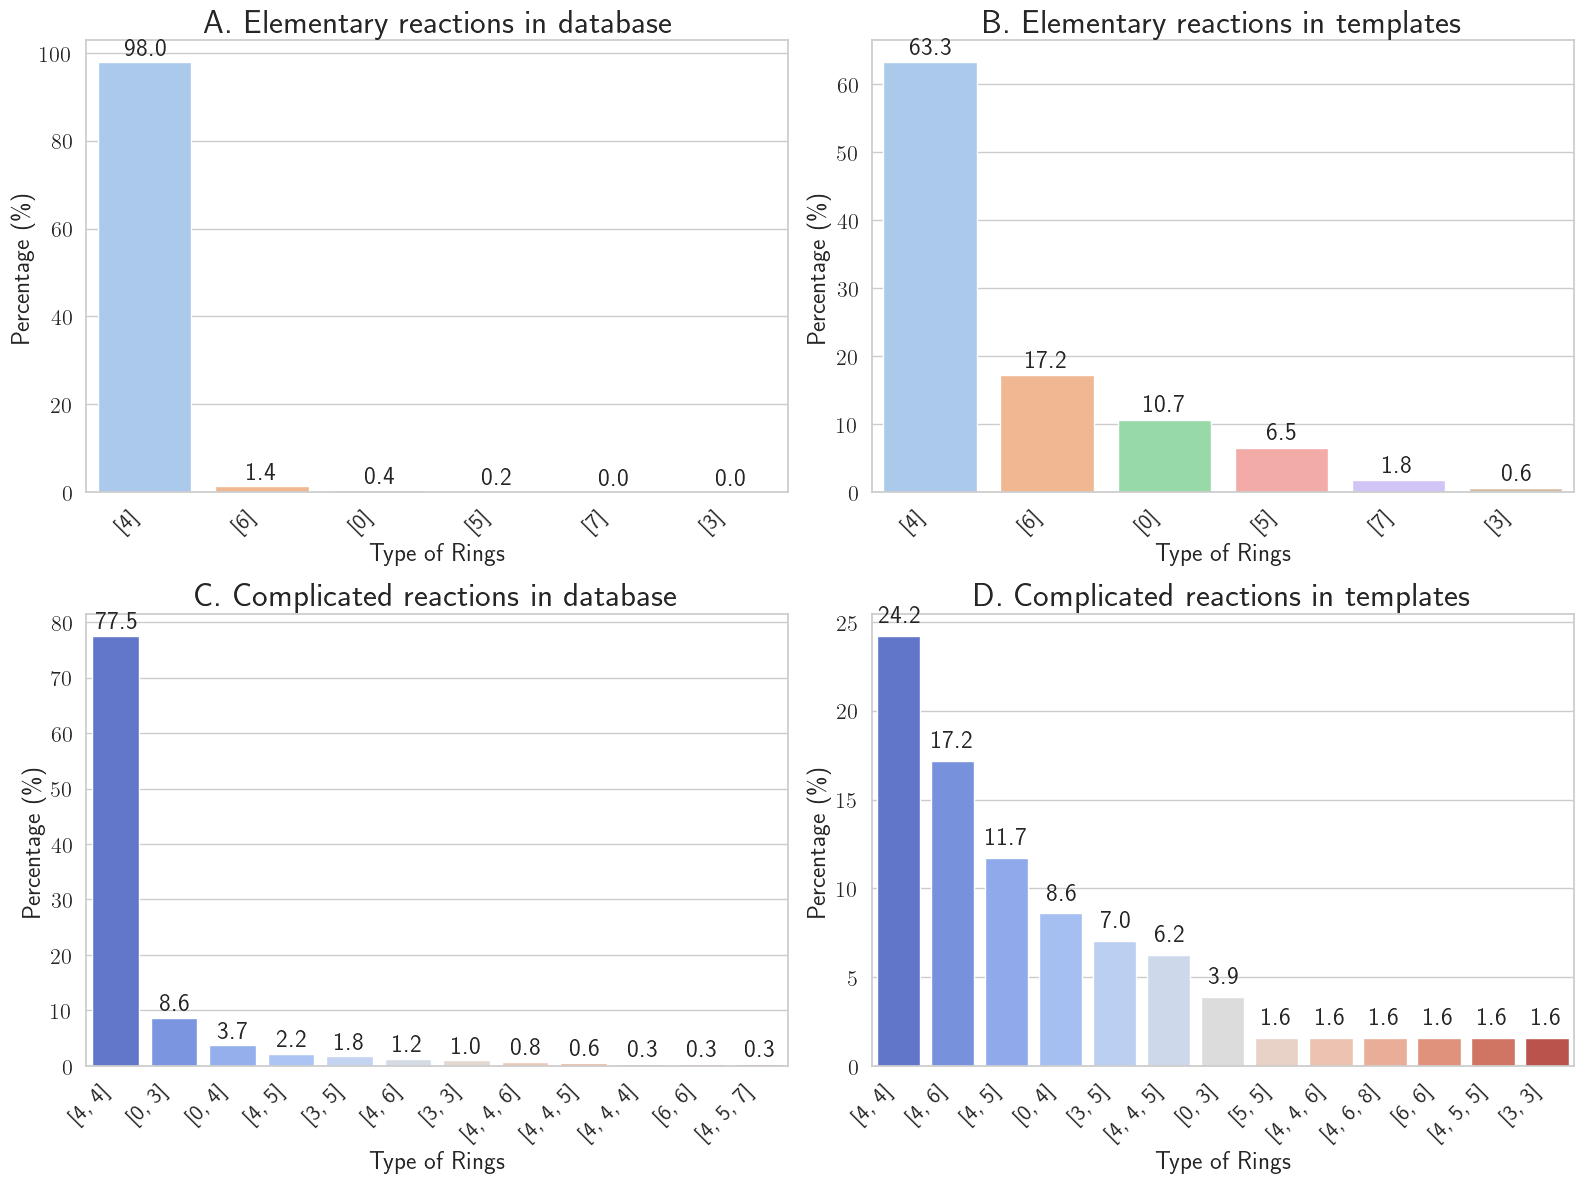

In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(16, 12))


plot_rules_distribution(
    element_count,
    ax=axs[0, 1],
    title="B. Elementary reactions in templates",
    color_pallet="pastel",
)
plot_rules_distribution(
    element_count_all,
    ax=axs[0, 0],
    title="A. Elementary reactions in database",
    color_pallet="pastel",
)
plot_rules_distribution(
    complex_count,
    ax=axs[1, 1],
    title="D. Complicated reactions in templates",
    refinement=True,
    color_pallet="coolwarm",
)
plot_rules_distribution(
    complex_count_all,
    ax=axs[1, 0],
    title="C. Complicated reactions in database",
    refinement=True,
    color_pallet="coolwarm",
    threshold=0.3,
)


plt.tight_layout()
# plt.savefig('../../Docs/Analysis/fig/rings_type.pdf', dpi = 600)
plt.show()

## Time Benchmark for Rule Clustering

In [1]:
data = [
    {
        "Type": "Hierarchical",
        "R0": f"{58.9 / 60:.2f}",
        "R1": f"{47.21 / 60:.2f}",
        "R2": f"{90.92 / 60:.2f}",
        "R3": f"{101.66 / 60:.2f}",
    },
    {
        "Type": "Empirical",
        "R0": f"{57.82 / 60:.2f}",
        "R1": f"{275.02 / 60:.2f}",
        "R2": f"{1807.58 / 60:.2f}",
        "R3": f"{5675.54 / 60:.2f}",
    },
]

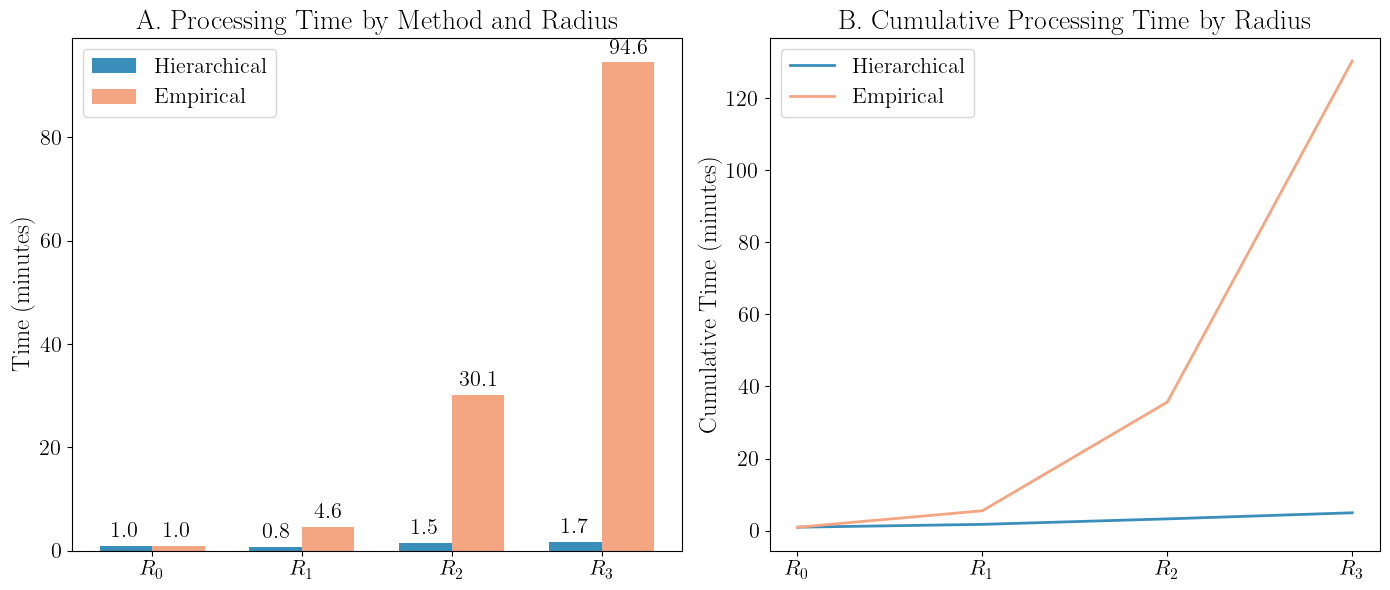

In [5]:
import matplotlib.pyplot as plt

plt.rc("text", usetex=True)  # Enable LaTeX rendering
plt.rc("font", family="serif")  # Optional: use serif font
from _plot_analysis import plot_bar_compare, plot_cumulative_line

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
radius = [0, 1, 2, 3]
hier = [58.9, 47.21, 90.92, 101.66]
hier = [round(value / 60, 2) for value in hier]
emp = [57.82, 275.02, 1807.58, 5675.54]
emp = [round(value / 60, 2) for value in emp]
# Plot on the first subplot for demonstration
plot_bar_compare(data, axes[0])
plot_cumulative_line(axes[1], radius, hier, emp)

# Adjust layout and show the plot
plt.tight_layout()
# plt.savefig('../../Docs/Analysis/fig/time_cluster.pdf', dpi = 600)
plt.show()

## Rule Composition

In [ ]:
import sys

sys.path.append("../../")
from SynTemp.SynITS.its_extraction import ITSExtraction
from SynTemp.pipeline import extract_its, rule_extract, write_gml

In [ ]:
data = [
    {"R-id": "Alkyne-reduction", "rsmi": "[CH:1]#[CH:2].[H:3][H:4]>>[CH2:1]=[CH2:2]"},
    {"R-id": "Alkene-reduction", "rsmi": "[CH2:1]=[CH2:2].[H:3][H:4]>>[CH3:1]-[CH3:2]"},
]

In [ ]:
its_correct, its_incorrect, all_uncertain_hydrogen = extract_its(
    data, mapper_types=["rsmi"], n_jobs=1
)

reaction_dicts, templates, hier_templates = rule_extract(
    its_correct,
)


gml_rules = write_gml(templates, None, "Cluster_id", "RC", True)

In [ ]:
from SynTemp.SynComp.rule_compose import RuleCompose
from mod import *

rule_0 = ruleGMLString(gml_rules[0][0])
rule_1 = ruleGMLString(gml_rules[0][1])

combo = RuleCompose._compose(rule_0, rule_1)

In [ ]:
print(combo[0].getGMLString())

In [ ]:
from SynTemp.SynUtils.utils import load_database, load_from_pickle

complete = load_from_pickle("../../Data/Temp/Benchmark/Complete/templates.pkl.gz")
data_cluster = load_from_pickle(
    "../../Data/Temp/Benchmark/Complete/data_cluster.pkl.gz"
)

In [ ]:
temp_0 = complete[0]

In [ ]:
single = [value for value in temp_0 if value["Reaction Step"] == 1]
double = [value for value in temp_0 if value["Reaction Step"] == 2]
triple = [value for value in temp_0 if value["Reaction Step"] == 3]

In [33]:
single_path = "../../Data/Temp/RuleComp/Single"
double_path = "../../Data/Temp/RuleComp/Double"

In [ ]:
from SynTemp.pipeline import write_gml

In [ ]:
write_gml([double], double_path)

In [30]:
import glob

compose = []
for i in glob.glob("../../Data/Temp/RuleComp/Compose/*gml"):
    compose.append(i)

In [32]:
len(compose)

16630